<a href="https://colab.research.google.com/github/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/Young%2FLSTM/Pytorch_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocess**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv'
url_B = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv'
url_C = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)
# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['label'].value_counts())
print(original_df_C.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   90000 non-null  object
 1   label   90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None
label
neu    67385
neg    16335
pos     6280
Name: count, dtype: int64
                                               tweet label
0  Coronavirus | Human Coronavirus Types | CDC ht...   neu
1  @shehryar_taseer That‚Äôs üíØ true , \nCorona...   neu
2  TLDR: Not SARS, possibly new coronavirus. Diff...   neg
3  Disease outbreak news from the WHO: Middle Eas...   neu
4  China - Media: WSJ says sources tell them myst...   neu
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-n

In [ ]:
# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
coronavirus | human coronavirus types | cdc https://t.co/ixoxvrarib


In [ ]:

# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
coronavirus | human coronavirus types | cdc 


In [ ]:
# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
 that‚äôs üíø true , 
corona virus 
swine flue 
bird flu in december when whole pk is busy in marriage‚ä¶ 


In [ ]:

# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
 thats  true  
corona virus 
swine flue 
bird flu in december when whole pk is busy in marriage 


In [ ]:

# @title #### 3.4.5 Removing Stop Words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stop words corpus

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['tweet'] = df['tweet'].apply(remove_stopwords)
df_A['tweet'] = df_A['tweet'].apply(remove_stopwords)
df_B['tweet'] = df_B['tweet'].apply(remove_stopwords)
df_C['tweet'] = df_C['tweet'].apply(remove_stopwords)

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
thats true corona virus swine flue bird flu december whole pk busy marriage


## Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [coronavirus, human, coronavirus, types, cdc]
1    [thats, true, corona, virus, swine, flue, bird...
2    [tldr, sars, possibly, new, coronavirus, diffi...
3    [disease, outbreak, news, middle, east, respir...
4    [china, media, wsj, says, sources, tell, myste...
Name: tweet, dtype: object


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])

# Find the maximum length of the sequences
max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())

0    [1, 382, 1, 2558, 69, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [135, 508, 3, 2, 1736, 9462, 2195, 41, 2302, 3...
2    [9463, 240, 1321, 8, 1, 2386, 746, 102, 1059, ...
3    [93, 10, 13, 957, 810, 1166, 2303, 1, 9464, 33...
4    [4, 104, 2607, 20, 1286, 272, 3169, 861, 8, 1,...
Name: tweet, dtype: object


## Without Embeddings

## GloVe Embedding

In [ ]:
import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

## Train-Val-Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['label'] = label_encoder.fit_transform(all_data['label'])
labels = all_data['label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initiate dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# LSTM Model and training
Need to change to adapt different embeddings

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class LSTM_model(nn.Module):
    def __init__(self, embedding_matrix, num_hid, num_out, batch_size=1, num_layers=1):
        super().__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        self.lstm = nn.LSTM(embedding_matrix.shape[1], num_hid, num_layers, batch_first=True)
        self.fc = nn.Linear(num_hid, num_out)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            if weight.dim() > 1:
                nn.init.xavier_uniform_(weight)
            else:
                nn.init.uniform_(weight, -stdv, stdv)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(self.num_layers, x.size(0), self.num_hid).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.num_hid).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
num_hid = 128
num_out = 3
learning_rate = 0.001
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


Epoch [1/10], Train Loss: 0.7110, Val Loss: 0.7244, Train Acc: 74.95, Val Acc: 74.27
Epoch [2/10], Train Loss: 0.4320, Val Loss: 0.3191, Train Acc: 85.47, Val Acc: 89.12
Epoch [3/10], Train Loss: 0.2425, Val Loss: 0.2362, Train Acc: 91.94, Val Acc: 92.39
Epoch [4/10], Train Loss: 0.1484, Val Loss: 0.1853, Train Acc: 95.45, Val Acc: 94.59
Epoch [5/10], Train Loss: 0.0939, Val Loss: 0.1826, Train Acc: 97.25, Val Acc: 95.04
Epoch [6/10], Train Loss: 0.0630, Val Loss: 0.1646, Train Acc: 98.20, Val Acc: 95.43
Epoch [7/10], Train Loss: 0.0434, Val Loss: 0.1628, Train Acc: 98.75, Val Acc: 96.15
Epoch [8/10], Train Loss: 0.0317, Val Loss: 0.1674, Train Acc: 99.11, Val Acc: 96.37
Epoch [9/10], Train Loss: 0.0228, Val Loss: 0.1698, Train Acc: 99.35, Val Acc: 96.66
Epoch [10/10], Train Loss: 0.0174, Val Loss: 0.2030, Train Acc: 99.54, Val Acc: 96.65
Training complete


## Results Visualization

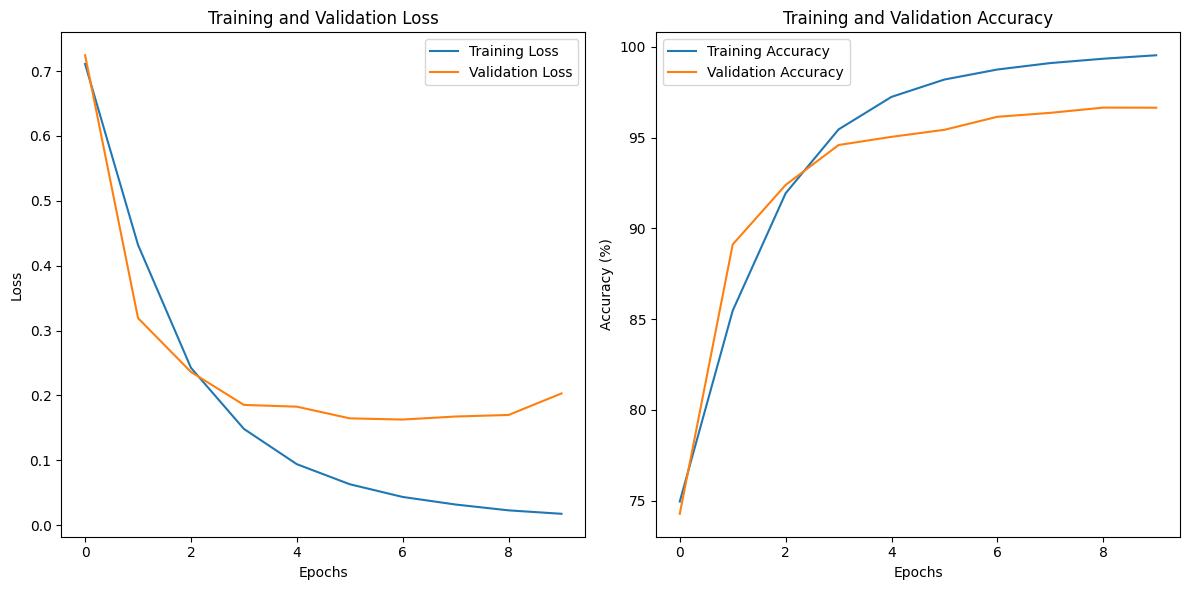

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Evaluate Results of Test Set
(include learning curves & confusion matrix)

Accuracy: 0.9668
Precision: 0.9669
Recall: 0.9668
F1 Score: 0.9668


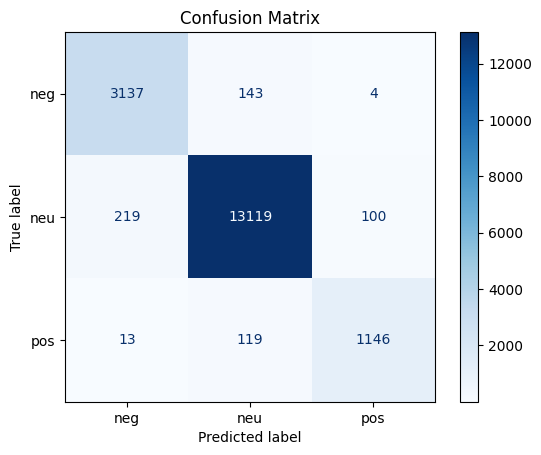

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Analysis(Pros & Cons)

# Hyperparameter Tuning

## learning rate to 0.0015

In [ ]:
# Model parameters
num_hid = 128
num_out = 3
learning_rate = 0.0015
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


Epoch [1/10], Train Loss: 0.7118, Val Loss: 0.6363, Train Acc: 74.95, Val Acc: 73.86
Epoch [2/10], Train Loss: 0.3244, Val Loss: 0.2378, Train Acc: 89.36, Val Acc: 92.67
Epoch [3/10], Train Loss: 0.1589, Val Loss: 0.1768, Train Acc: 95.21, Val Acc: 94.87
Epoch [4/10], Train Loss: 0.0870, Val Loss: 0.1613, Train Acc: 97.45, Val Acc: 95.61
Epoch [5/10], Train Loss: 0.0515, Val Loss: 0.1538, Train Acc: 98.50, Val Acc: 96.25
Epoch [6/10], Train Loss: 0.0317, Val Loss: 0.1636, Train Acc: 99.07, Val Acc: 96.63
Epoch [7/10], Train Loss: 0.0209, Val Loss: 0.1579, Train Acc: 99.40, Val Acc: 96.82
Epoch [8/10], Train Loss: 0.0154, Val Loss: 0.1840, Train Acc: 99.54, Val Acc: 96.99
Epoch [9/10], Train Loss: 0.0115, Val Loss: 0.1714, Train Acc: 99.67, Val Acc: 97.07
Epoch [10/10], Train Loss: 0.0099, Val Loss: 0.1770, Train Acc: 99.72, Val Acc: 97.03
Training complete


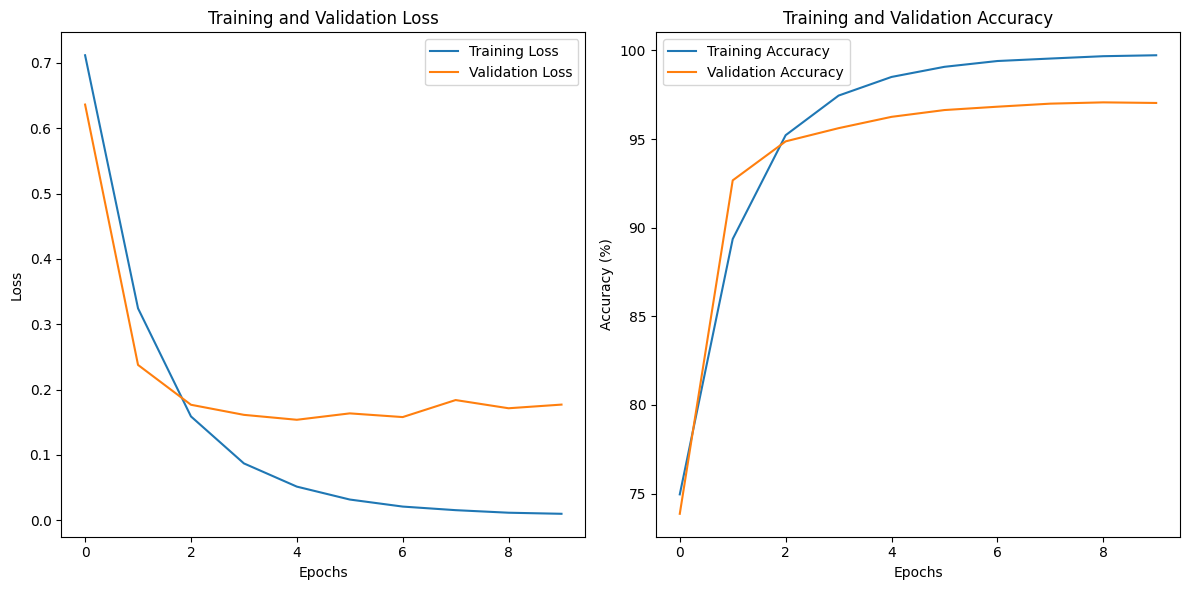

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Accuracy: 0.9708
Precision: 0.9708
Recall: 0.9708
F1 Score: 0.9708


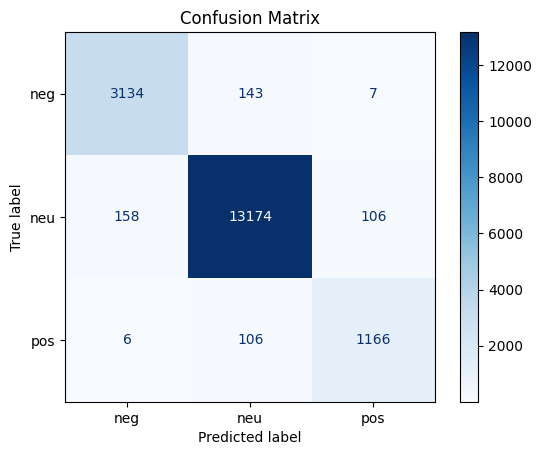

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Training with params: {'num_hid': 256, 'num_layers': 2, 'learning_rate': 0.0001, 'batch_size': 32}


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

## tuning the num_layer

In [ ]:
# Model parameters
num_hid = 128
num_out = 3
learning_rate = 0.0015
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


## Tuning the num_hid

## Tuning the batch_size

## Tuning the number of epoch

## Another Optimiser

# **My Tuning Summary/Analysis**
(compare the fine-tuning and hyperparameters tuning)

# **Compare Different Embeddings**

## Word2Vec embedding

## FastText Embedding

## Comparison Summary

## Implementing in different dataset(for simple model, should have good performance yet.)
if time permitted.